In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer


housing = pd.read_csv("housing.csv" , header = 0 , sep = ",")
# housing.head(10)
# housing.tail(7)
# housing.shape
# housing[-9:-1]
# housing.info()
# housing.columns
# housing['ocean_proximity'].unique()
# housing['ocean_proximity'].value_counts()
# housing[housing['ocean_proximity']== 'ISLAND']
# housing[["population" , "ocean_proximity"]][housing['ocean_proximity']== 'ISLAND']
# housing.hist(bins = 50 , figsize = (20,15))
# # plt.show()
train_set , tarin_test = train_test_split(housing , test_size = 0.2 , random_state = 2)
train_set.shape
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


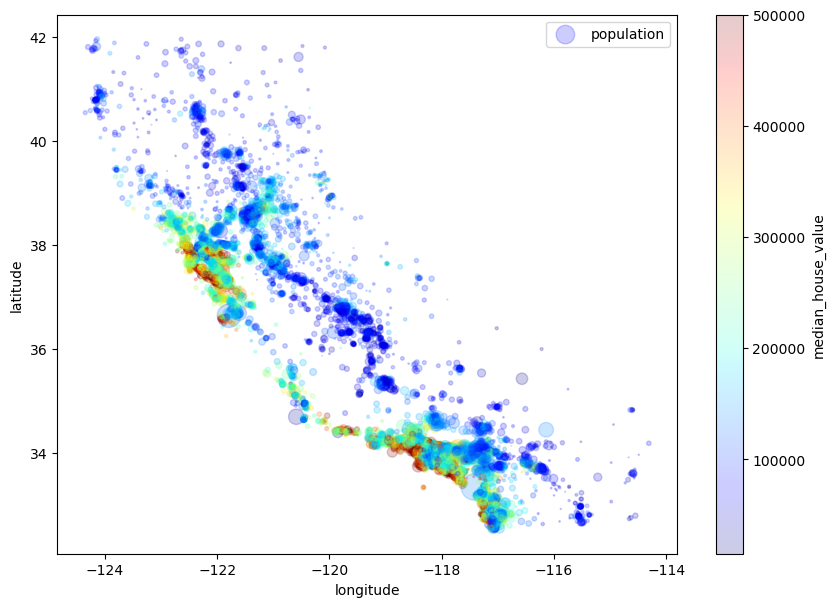

In [5]:
data = train_set.copy()
data.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.2,
    figsize=(10, 7),
    s=data["population"] / 100, 
    label="population",            
    c="median_house_value",          
    cmap=plt.get_cmap("jet"),     
    colorbar=True
)
plt.legend()
plt.show()

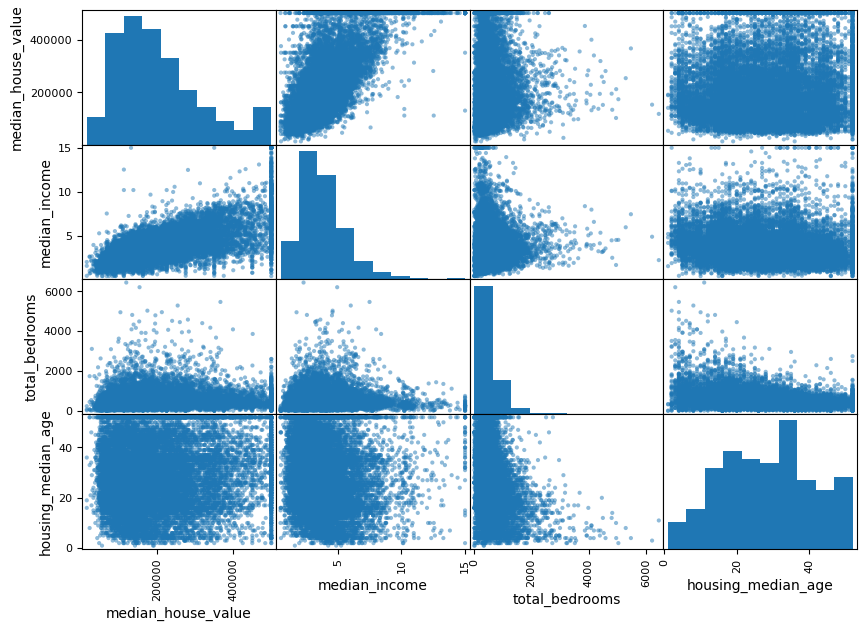

In [6]:
#standardcorration coefficient
# corr_matrix = data.corr()
# corr_matrix["median_house_value"].sort_values(ascending= False)
features = ["median_house_value", "median_income", "total_bedrooms", "housing_median_age"]

scatter_matrix(data[features], figsize=(10, 7))   
plt.show()

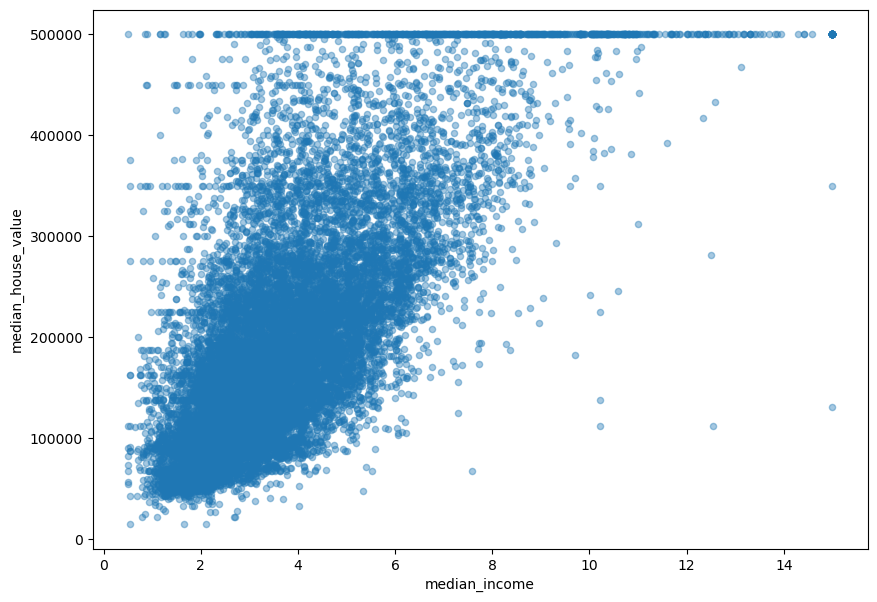

In [7]:
data.plot(kind= "scatter" , x ="median_income" , y="median_house_value",figsize = (10,7) , alpha = 0.4)
plt.show()

In [8]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [9]:
data["total_rooms_per_households"] =data["total_rooms"] / data["households"]
data["total_bedrooms_per_rooms"] =data["total_bedrooms"] / data["total_rooms"]
data["population_per_households"] =data["population"] / data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_bedrooms_per_rooms,population_per_households
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,4.443645,0.255262,3.350120
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,5.976471,0.171752,2.535294
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4.088785,0.244571,4.350467
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,2.740088,0.368167,2.629956
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,5.166667,0.194069,3.037634


In [10]:
# corr_matrix = data.corr()
# corr_matrix["median_house_value"].sort_values(ascending= False)

In [11]:
df = train_set.copy()
df_lable = df["median_house_value"].copy()
df = df.drop("median_house_value" , axis =1)
# df.info()
df_num = df.drop("ocean_proximity", axis =1)

#missing data
# median = df_num["median_house_value"].median()
#  df_num["median_house_value"].fillna(median)

imputer = SimpleImputer(missing_values = np.nan , strategy = "median")
imputer.fit(df_num)
x = imputer.transform(df_num)   #arry
df_num_impute_tr = pd.DataFrame(x , columns = df_num.columns)
df_num_impute_tr.info()
df.info()
df_num_impute_tr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2072 to 2575
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_r

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815


In [12]:
# custom Trasfer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_population = X[:, rooms_ix] / X[:, population_ix]
        population_per_households = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_population, population_per_households, bedrooms_per_room]

 
custom = CombinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)

 
columns = list(df_num_impute_tr.columns)
columns.append("rooms_per_population")
columns.append("population_per_households")
columns.append("bedrooms_per_room")

data_custom_tr.columns = columns
data_custom_tr.head(10)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_population,population_per_households,bedrooms_per_room
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,1.326414,3.350120,0.255262
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,2.357309,2.535294,0.171752
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,0.939850,4.350467,0.244571
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,1.041876,2.629956,0.368167
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,1.700885,3.037634,0.194069
5,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,1.883703,2.590164,0.196136
6,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,2.414914,2.075397,0.209026
7,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,2.386152,2.279661,0.199611
8,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,1.917136,3.153226,0.171825
9,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,2.115101,2.850394,0.181106


In [13]:
# data_custom_tr.describe()
from sklearn.preprocessing import StandardScaler
import pandas as pd

feature_scaler = StandardScaler()
data_num_tmp_tr = pd.DataFrame(
    feature_scaler.fit_transform(data_custom_tr.values),
    columns=data_custom_tr.columns
)
data_num_tmp_tr.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_population,population_per_households,bedrooms_per_room
0,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,-0.577707,0.024660,0.658887
1,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,0.347411,-0.049867,-0.669911
2,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,-0.924607,0.116155,0.488784
3,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,-0.833049,-0.041209,2.455426
4,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,-0.241659,-0.003921,-0.314810
5,0.620480,-0.858555,0.267947,-0.118873,-0.168316,-0.147668,-0.034063,0.149805,-0.077600,-0.044848,-0.281914
6,0.565617,-0.755707,0.188566,-0.053377,-0.024128,-0.335905,0.007427,0.442011,0.399106,-0.091931,-0.076809
7,1.243930,-1.396168,0.267947,1.125097,1.150651,0.619094,1.148390,0.141776,0.373295,-0.073248,-0.226629
8,0.116733,0.277445,-1.557798,0.498595,0.250066,0.448990,0.308226,0.178011,-0.047597,0.006651,-0.668750
9,-1.449373,0.875831,-0.843376,-0.156816,-0.288867,-0.301366,-0.311524,0.533972,0.130056,-0.021047,-0.521074


In [14]:
#Lable Encode
from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()
data_cat = df["ocean_proximity"]
data_cat_tr_tmp = encoder.fit_transform(data_cat)   
data_cat_tr = pd.DataFrame(data_cat_tr_tmp, columns=["ocean_proximity"])
data_cat_tr.head()

,ocean_proximity
0,1
1,0
2,1
3,0
4,1


In [15]:
#OneHotEncoder
import sklearn
print(sklearn.__version__)


1.6.1


In [16]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder_1hot = OneHotEncoder(sparse_output=False)
encoder_1hot_tmp_tr = encoder_1hot.fit_transform(df[["ocean_proximity"]])
encoder_1hot_tmp = pd.DataFrame(
    encoder_1hot_tmp_tr,
    columns=encoder_1hot.get_feature_names_out(["ocean_proximity"])

)
encoder_1hot_tmp.columns = encoder_1hot_tmp.columns.str.replace('ocean_proximity_', 'prox_')

encoder_1hot_tmp.head()



,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [17]:
# import numpy as np
# import pandas as pd
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.base import BaseEstimator, TransformerMixin

# rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         rooms_per_population = X[:, rooms_ix] / X[:, population_ix]
#         population_per_households = X[:, population_ix] / X[:, households_ix]
#         bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
#         return np.c_[X, rooms_per_population, population_per_households, bedrooms_per_room]


# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X[self.attribute_names].values
        
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# trans_set = train_set.copy()

# df_lable= df["median_house_value"]
# df = df.drop("ocean_proximity")
# df_num = df.drop("median_house_value")

# num_atter = list(df_num)
# cat_atter = ["ocean_proximity"]


# num_pipeline = Pipeline([
#     ('selector', DataFrameSelector(num_attribs)),
#     ('imputer', SimpleImputer(strategy="median")),
#     ('attribs_adder', CombinedAttributesAdder()),
#     ('std_scaler', StandardScaler())
# ])

# cat_pipeline = Pipeline([
#     ('selector', DataFrameSelector(cat_attribs)),
#     ('one_hot_encoder', OneHotEncoder())
# ])

# full_pipeline = FeatureUnion(transformer_list=[
#     ("num_pipeline", num_pipeline),
#     ("cat_pipeline", cat_pipeline)
# ])

# housing_prepared = full_pipeline.fit_transform(df)
# housing_prepared_df = pd.DataFrame (
#     housing_prepared.toarray() if hasattr(housing_prepared, "toarray") else housing_prepared,
#     columns=['longitude',	'latitude','housing_median_age','total_rooms','total_bedrooms',
#                                                                'population',	'households',	'median_income',
#                                                                'prox_<1H OCEAN' , 'prox_INLAND','prox_ISLAND','prox_NEAR BAY','prox_NEAR OCEAN',
#                                                                'rooms_per_population',	'population_per_households'	,'bedrooms_per_room'
#                                                               ])
                                   
# housing_prepared_df.head()

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# شاخص‌ها برای ویژگی‌های ترکیبی
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# کلاس افزودن ویژگی‌های ترکیبی
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_population = X[:, rooms_ix] / X[:, population_ix]
        population_per_households = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_population, population_per_households, bedrooms_per_room]

# کلاس انتخاب ستون‌ها
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

# تقسیم داده
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
df = train_set.copy()

# جداسازی برچسب
df_label = df["median_house_value"].copy()
df = df.drop("median_house_value", axis=1)

# مشخص کردن ویژگی‌های عددی و دسته‌ای
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
               'total_bedrooms', 'population', 'households', 'median_income']
cat_attribs = ["ocean_proximity"]

# لوله عددی
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

# لوله دسته‌ای
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot_encoder', OneHotEncoder())
])

# ترکیب کامل
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])


housing_prepared = full_pipeline.fit_transform(df)


housing_prepared_df = pd.DataFrame (
    housing_prepared.toarray() if hasattr(housing_prepared, "toarray") else housing_prepared,
    columns=['longitude',	'latitude','housing_median_age','total_rooms','total_bedrooms',
                                                               'population',	'households',	'median_income',
                                                                'prox_<1H OCEAN' , 'prox_INLAND','prox_ISLAND','prox_NEAR BAY','prox_NEAR OCEAN',
                                                                'rooms_per_population',	'population_per_households'	,'bedrooms_per_room'
                                                              ])
                                   


print(housing_prepared_df.columns)
housing_prepared_df.head()



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'prox_<1H OCEAN', 'prox_INLAND', 'prox_ISLAND', 'prox_NEAR BAY',
       'prox_NEAR OCEAN', 'rooms_per_population', 'population_per_households',
       'bedrooms_per_room'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN,rooms_per_population,population_per_households,bedrooms_per_room
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.552017,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,0.526956,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.082291,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.869143,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.661600,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0


In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared_df, df_label)

sample_data_prepared = housing_prepared_df.iloc[:4]

print("Prediction:\t", lin_reg.predict(sample_data_prepared))

sample_label = df_label.iloc[:4]
print("Labels:\t\t", list(sample_label))




Prediction:	 [180200.99086703 295050.35385968 247142.59267085 143107.88551124]
Labels:		 [103000.0, 382100.0, 172600.0, 93400.0]


In [26]:
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(housing_prediction ,df_label )
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(66948.3552080744)

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df ,df_label)

housing_prediction = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(housing_prediction, df_label )
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score( tree_reg , housing_prepared_df,df_label, scoring = "neg_mean_squared_error" , cv = 10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores , model_name):
    print("========", model_name, "========")
    print("scores",scores)
    print("mean", scores.mean())
    print("standard_devision",scores.std())
    print("===============================================")

display_scores(tree_rmse_scores , "Decision Tree Regression")

======== Decision Tree Regression ========
scores [68079.74297057 74722.5797322  68372.58458179 72339.76982044
 71352.08239469 68180.60829406 65975.20484659 67550.3723824
 70529.37678033 65989.7634522 ]
mean 69309.20852552683
standard_devision 2702.6176745613016


In [36]:
linear_scores = cross_val_score( lin_reg , housing_prepared_df,df_label, scoring = "neg_mean_squared_error" , cv = 10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores , "Linear Regression")

======== Linear Regression ========
scores [64295.98868071 69987.01218903 66833.05644598 65222.00269444
 67833.06786718 64956.91751976 64849.07344362 67712.52871258
 71550.5481448  68454.05536356]
mean 67169.42510616453
standard_devision 2279.476928224757


In [42]:
from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df,df_label)
forest_scores= cross_val_score(forest_reg, housing_prepared_df,df_label, scoring = "neg_mean_squared_error" , cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores , "Random Forest Regression")

======== Random Forest Regression ========
scores [46556.9503142  51785.06814264 48053.98588268 51235.10154121
 51394.38687606 46761.01172223 46950.12978984 50868.09780468
 48923.74935337 49641.21255076]
mean 49216.969397767396
standard_devision 1949.3548354119687
